In [1]:
import sys

sys.path.append("build/lib.macosx-10.13-intel-2.7")

import basc
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

maxatom = 8

# Needed to address a bug re: setting options without any views declared
#blankview = basc.view()

basc.readConfig("config.txt")
basc.setOption("Iseed", 54321)
basc.setOption("Ensemble", 40)

maxindex = 100


In [2]:
myview = []
result = []
for index in range(maxindex):
    myview.append(basc.view())
    myview[index].loadPBCor("data/points/simmap{}.alma.cycle2.6.noisy.flux.fits".format(index))
    myview[index].loadMap("data/points/simmap{}.alma.cycle2.6.noisy.image.fits".format(index))
    myview[index].loadBeam("data/points/simmap{}.alma.cycle2.6.noisy.psf.fits".format(index))
    
    print("simmap{} running...".format(index))
    sys.stdout.flush()
    
    myview[index].run()
    result.append(myview[index].getChain())

    

simmap0 running...
simmap1 running...
simmap2 running...
simmap3 running...
simmap4 running...
simmap5 running...
simmap6 running...
simmap7 running...
simmap8 running...
simmap9 running...
simmap10 running...
simmap11 running...
simmap12 running...
simmap13 running...
simmap14 running...
simmap15 running...
simmap16 running...
simmap17 running...
simmap18 running...
simmap19 running...
simmap20 running...
simmap21 running...
simmap22 running...
simmap23 running...
simmap24 running...
simmap25 running...
simmap26 running...
simmap27 running...
simmap28 running...
simmap29 running...
simmap30 running...
simmap31 running...
simmap32 running...
simmap33 running...
simmap34 running...
simmap35 running...
simmap36 running...
simmap37 running...
simmap38 running...
simmap39 running...
simmap40 running...
simmap41 running...
simmap42 running...
simmap43 running...
simmap44 running...
simmap45 running...
simmap46 running...
simmap47 running...
simmap48 running...
simmap49 running...
simmap50 r

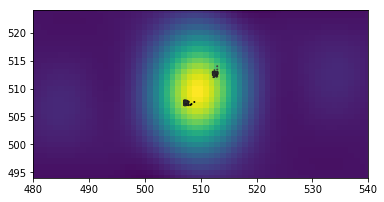

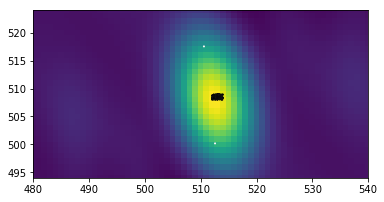

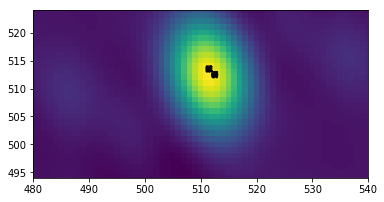

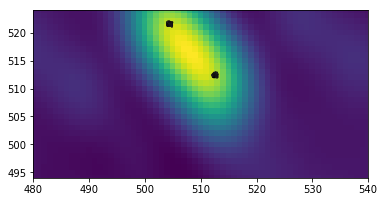

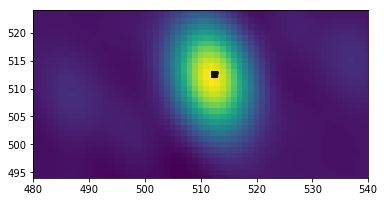

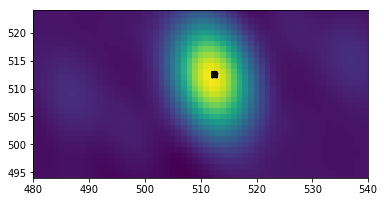

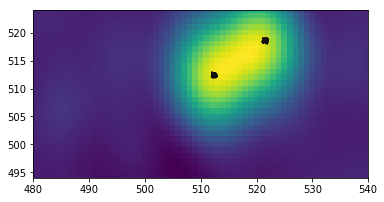

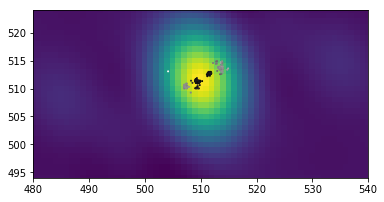

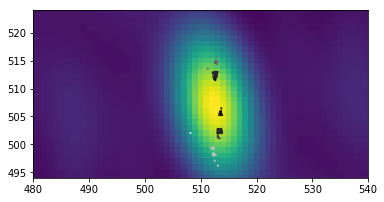

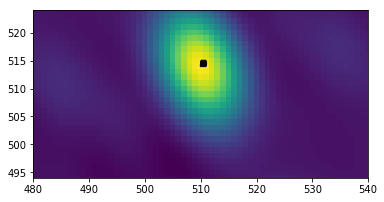

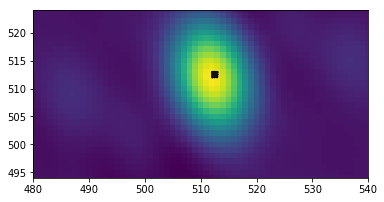

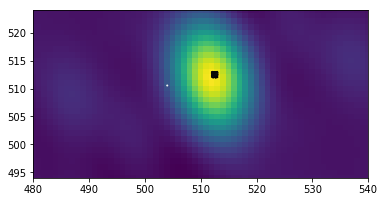

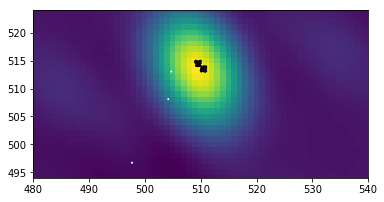

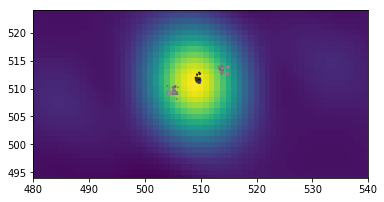

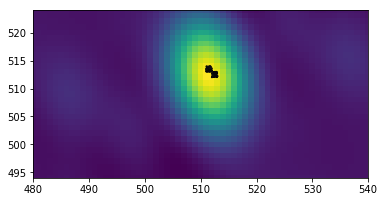

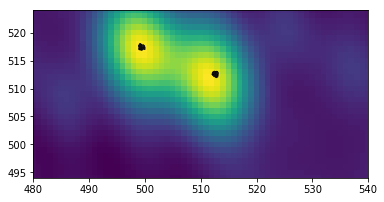

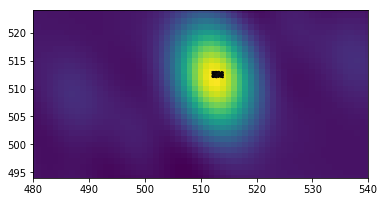

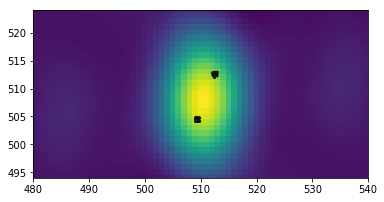

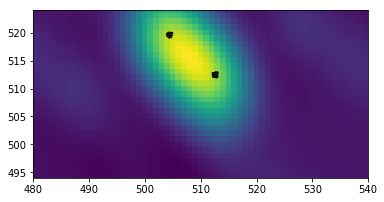

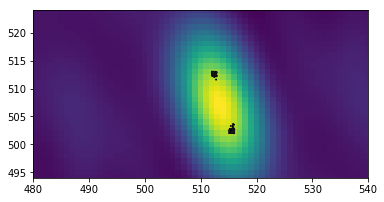

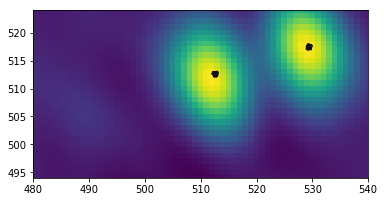

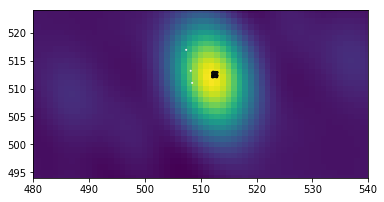

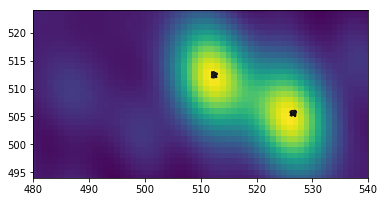

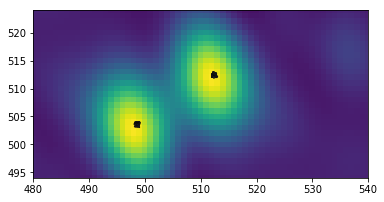

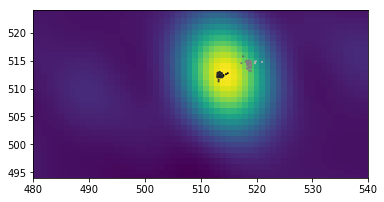

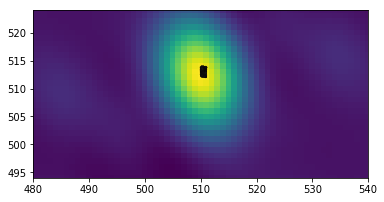

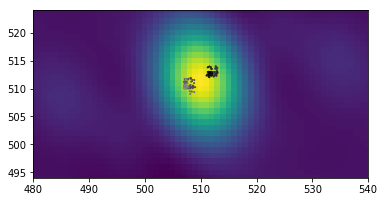

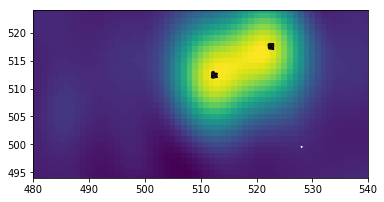

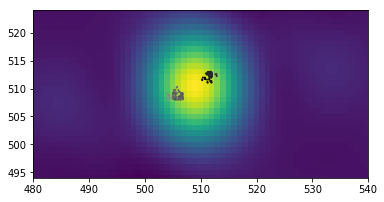

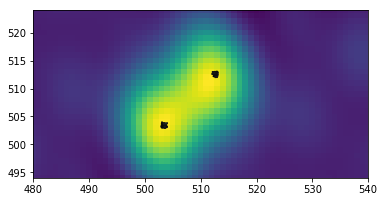

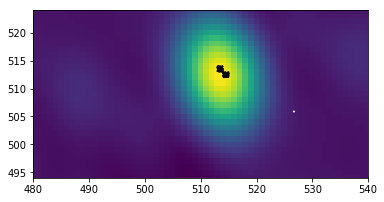

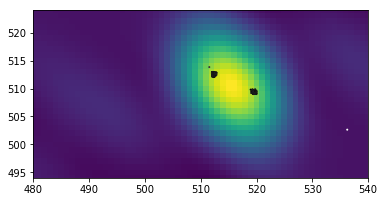

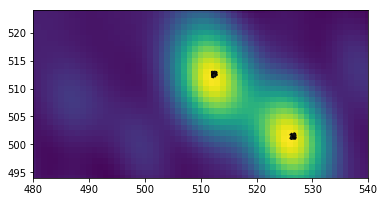

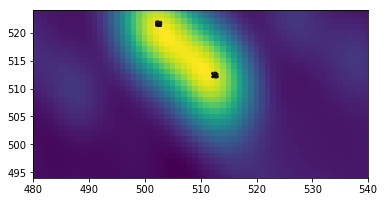

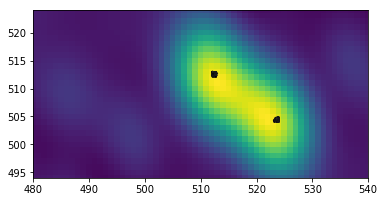

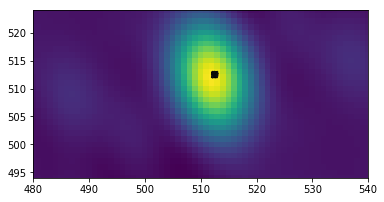

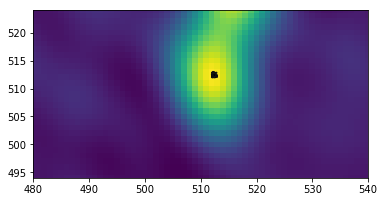

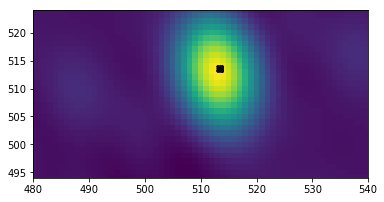

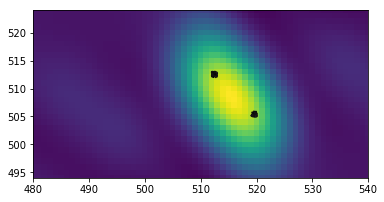

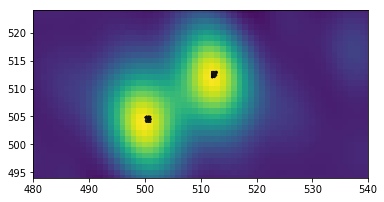

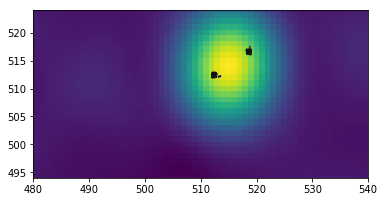

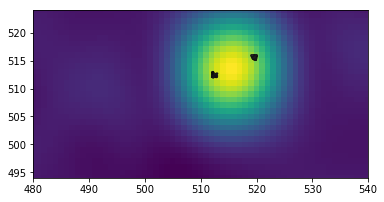

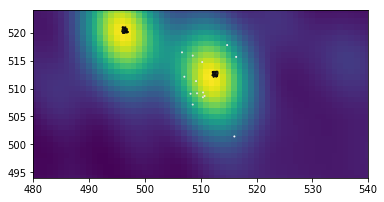

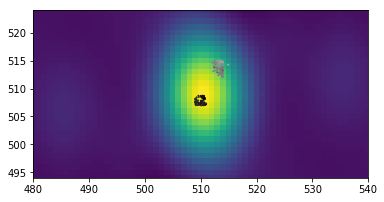

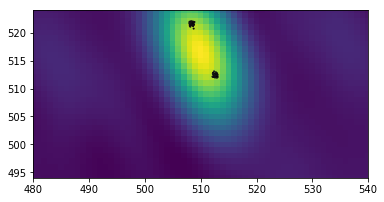

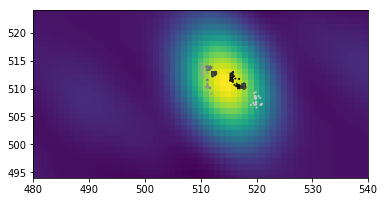

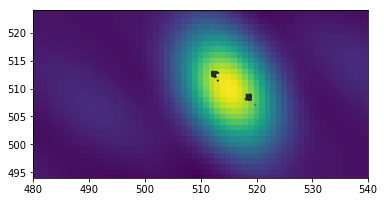

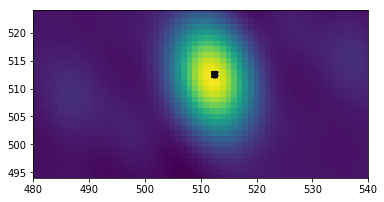

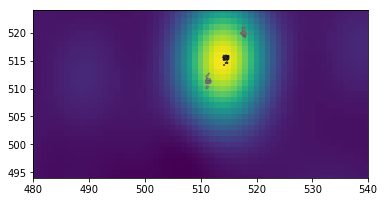

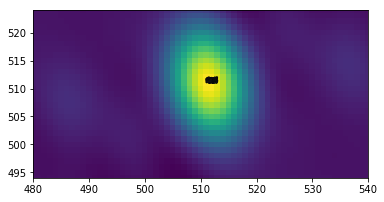

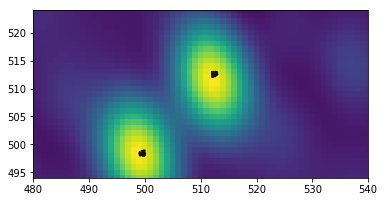

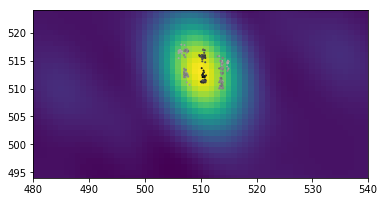

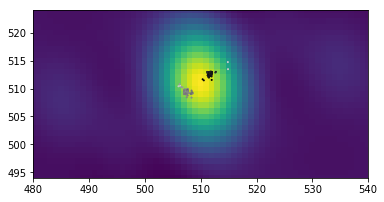

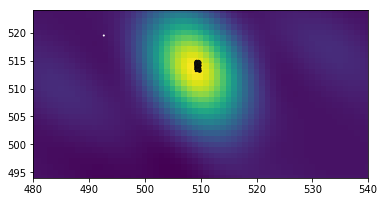

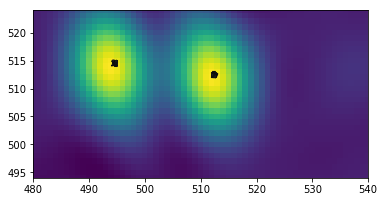

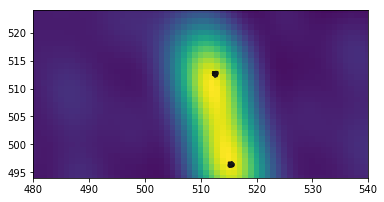

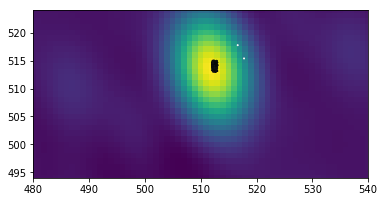

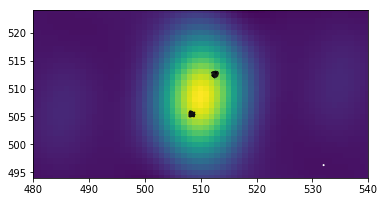

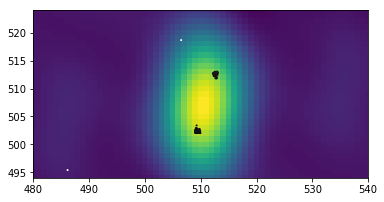

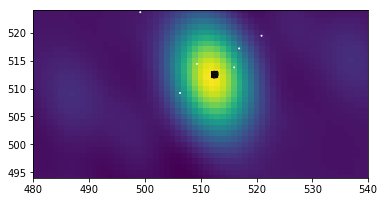

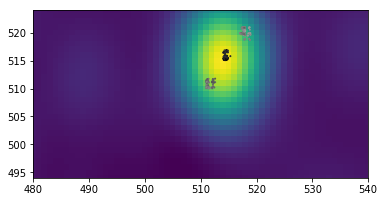

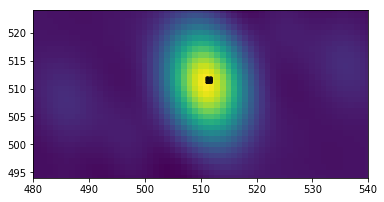

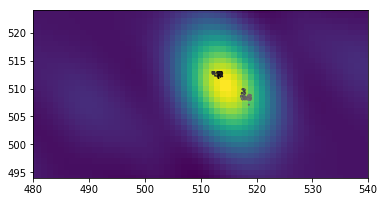

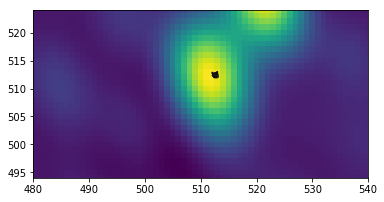

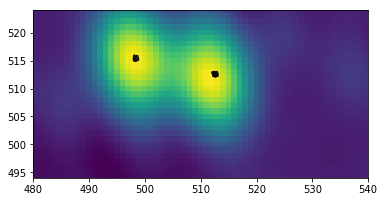

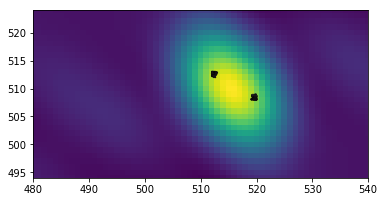

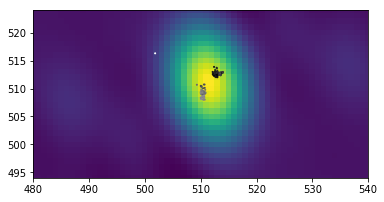

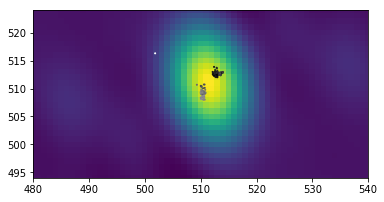

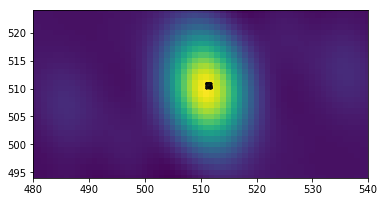

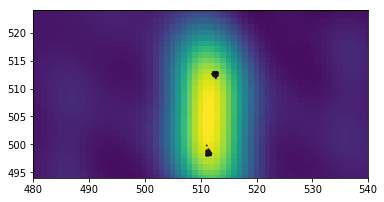

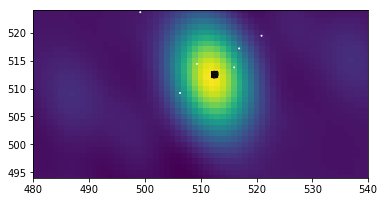

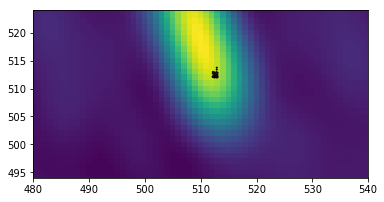

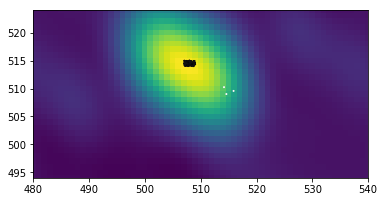

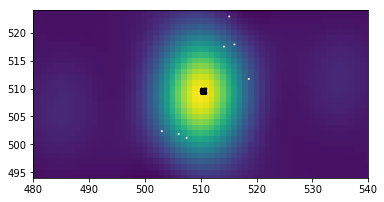

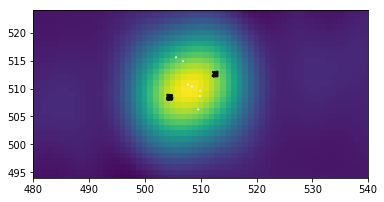

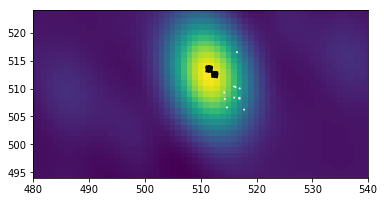

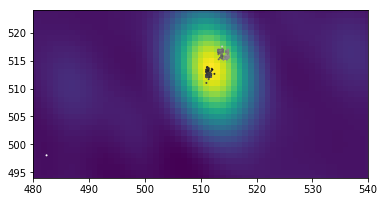

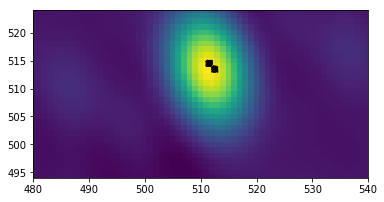

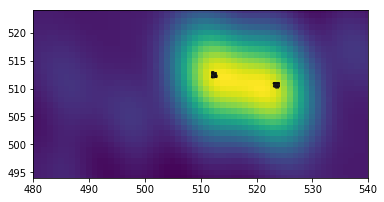

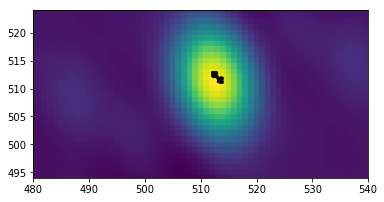

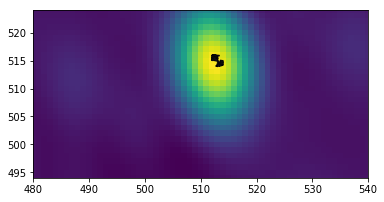

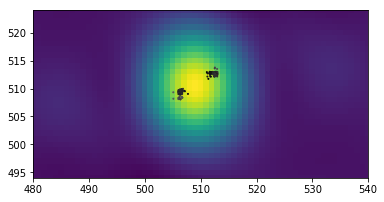

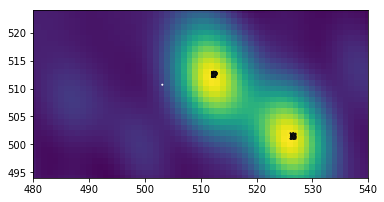

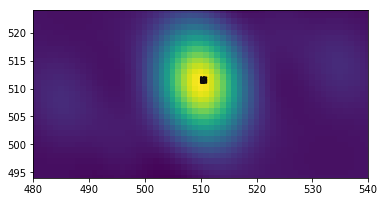

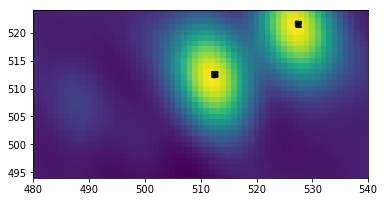

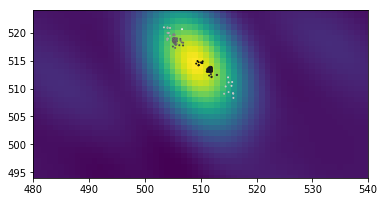

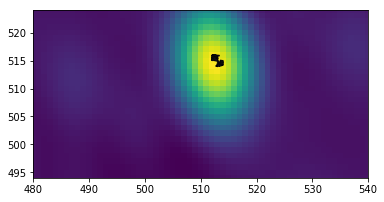

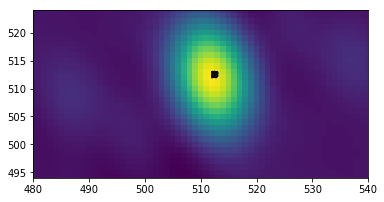

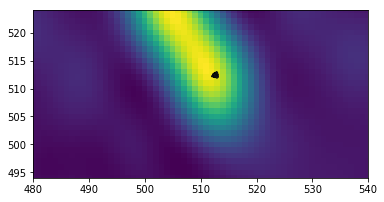

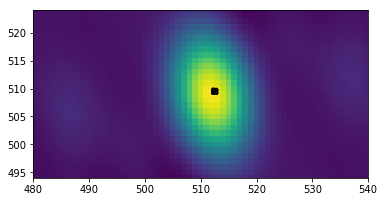

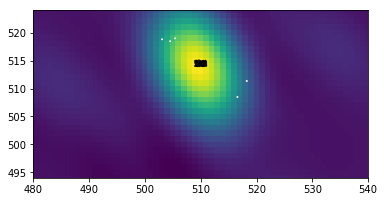

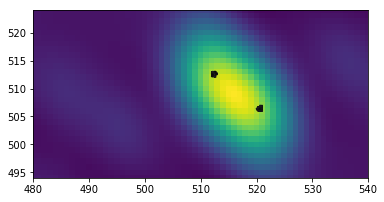

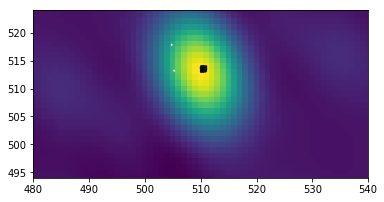

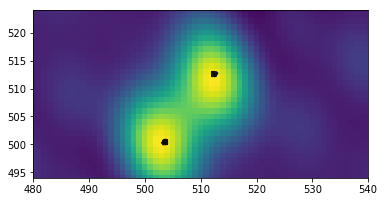

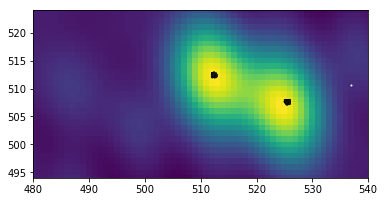

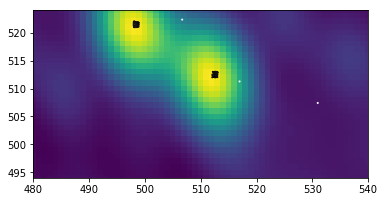

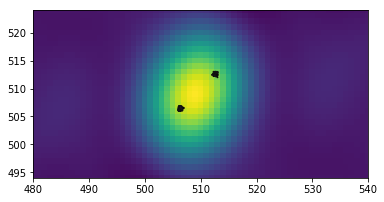

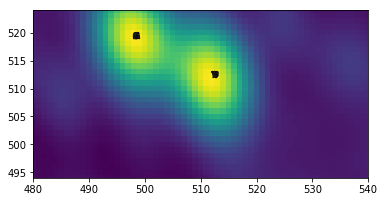

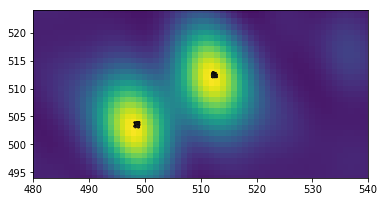

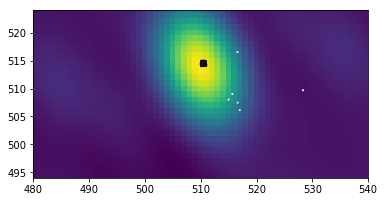

In [3]:
dx = (480,540)
dy = (494,524)

for index in  range(0,maxindex):
    resultstable=open("results_{}.txt".format(index), "w")
    
    resultstable.write("k x y F u v cell\n")
    
    u = np.round(result[index]['x'])
    v = np.round(result[index]['y'])
    w = v*1024 + u
    for n in range(len(result[index])):
        resultstable.write("{} {} {} {} {} {} {}\n".format(result[index]['k'][n], result[index]['x'][n],
                                                           result[index]['y'][n], result[index]['F'][n],
                                                           u[n], v[n], w[n]))
    resultstable.close()
    
    plt.scatter(result[index]['y'], result[index]['x'], s=1, c=-result[index]['F'], cmap='gray')
    plt.imshow(myview[index].map(0))
    plt.xlim(dx)
    plt.ylim(dy)
    plt.savefig("data/points/scatter{}.png".format(index))
    plt.show()
